
# Predicting Turbine Energy Yield (TEY) using ambient variables as features.

In [162]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [163]:
# Import Dataset
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [164]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [165]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [166]:
df.shape

(15039, 11)

In [167]:
#Checking the data types
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [168]:
#Unique values for every feature
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [170]:
df[df.duplicated()].shape

(0, 11)

In [171]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


The features are not on the same scale. For example `AP` has a mean of `1013.19` and `CO` has a mean value of `1.97`. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [173]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [174]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# Data Visualization<a class="anchor" id="4"></a>

+ ###  Univariate plots<a class="anchor" id="4.1"></a>

C:\Users\mruna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


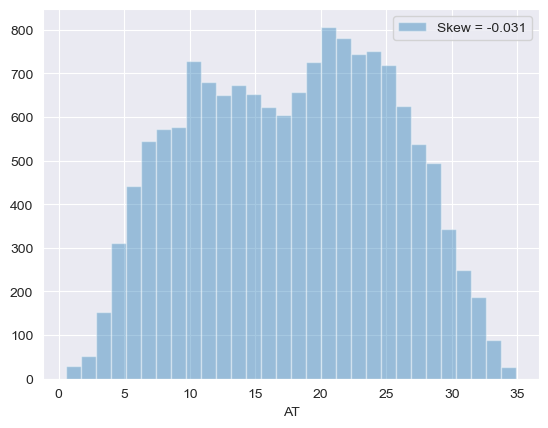

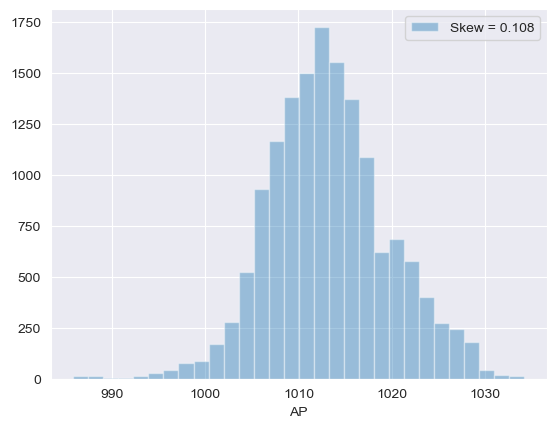

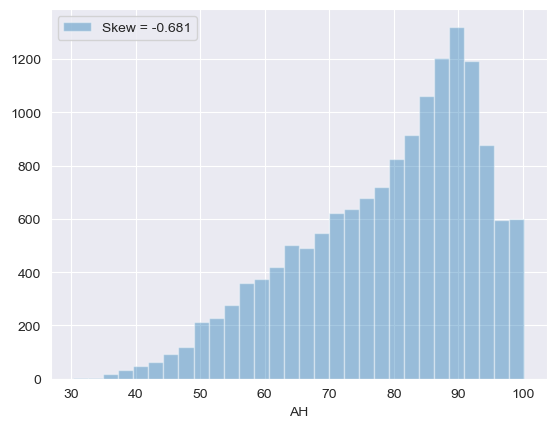

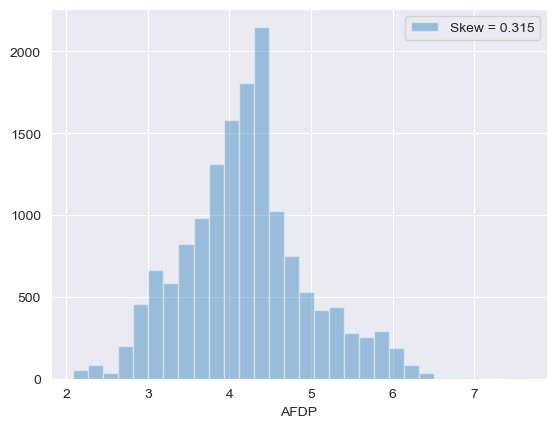

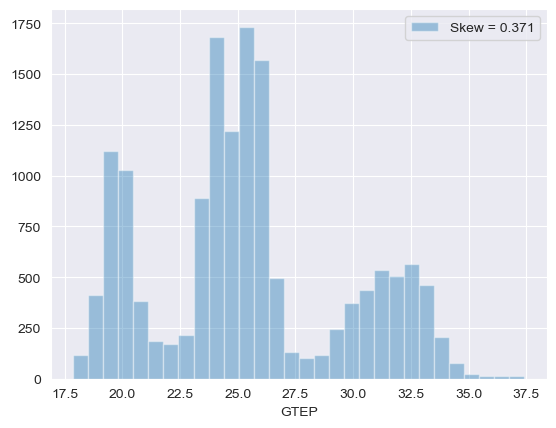

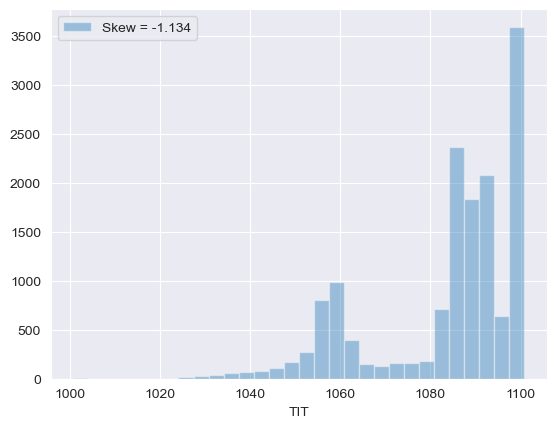

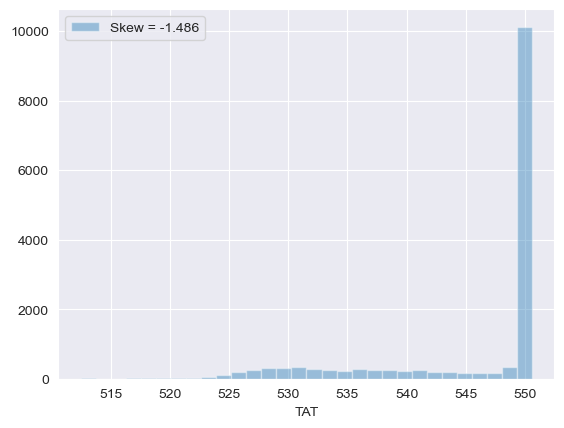

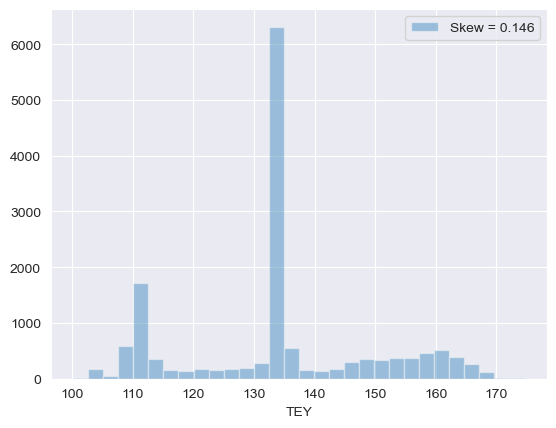

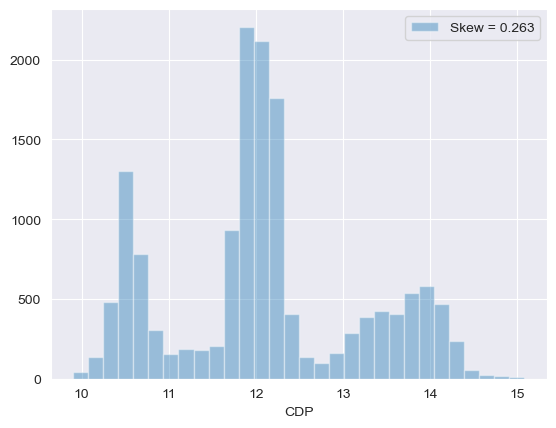

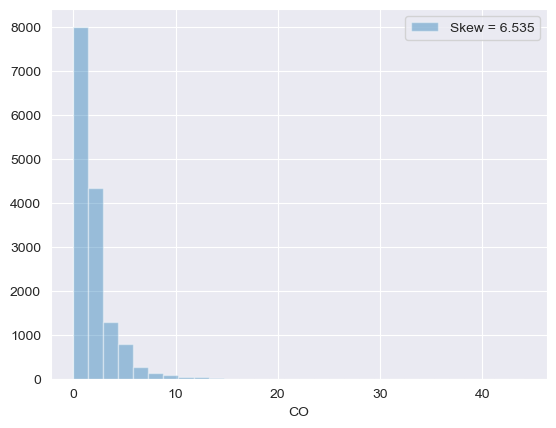

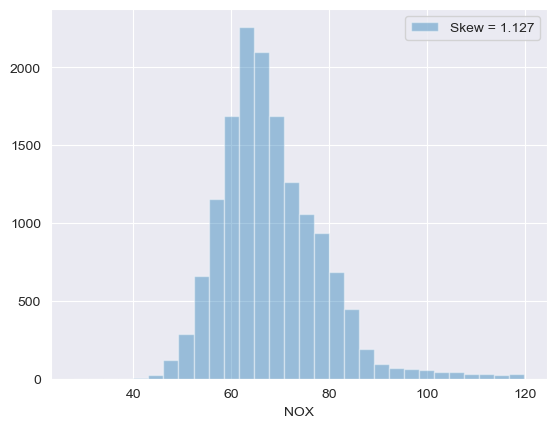

In [175]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [176]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

<AxesSubplot:>

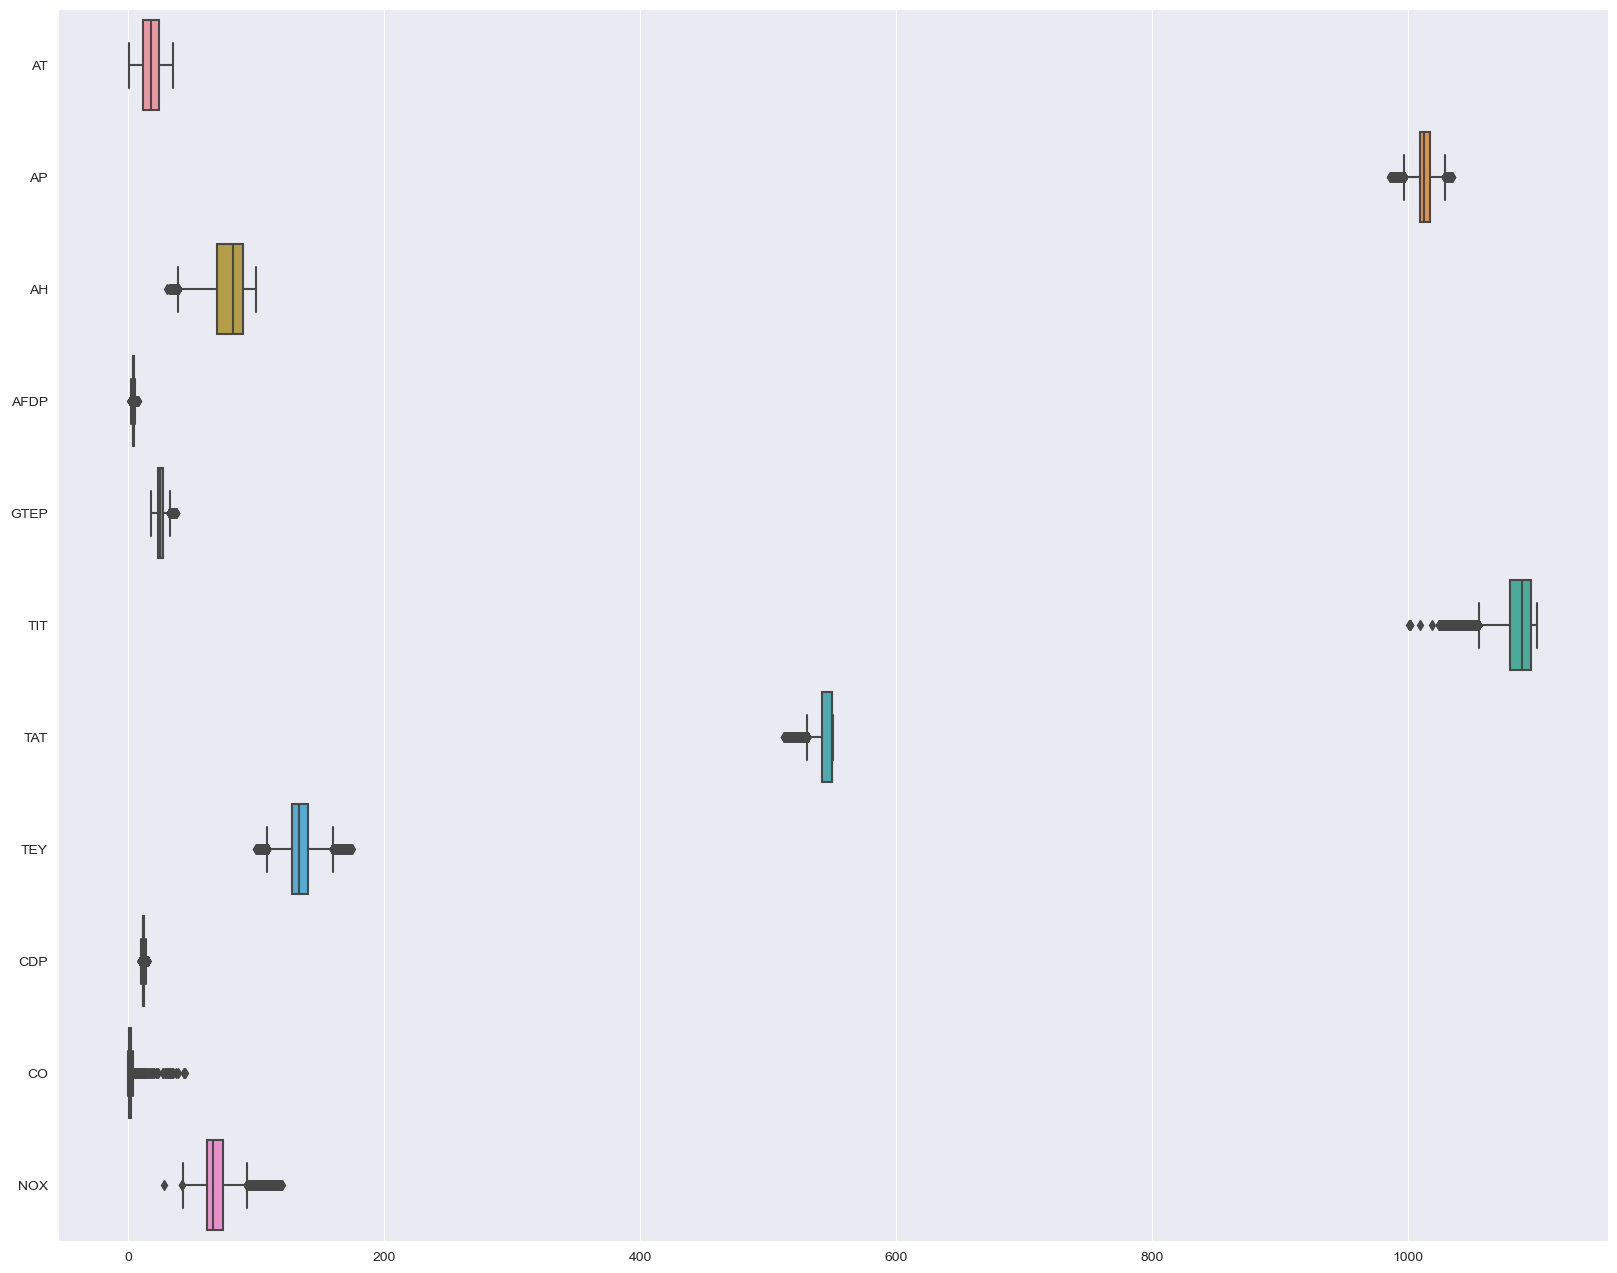

In [177]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

+ ### Multivariate Analysis<a class="anchor" id="4.2"></a>



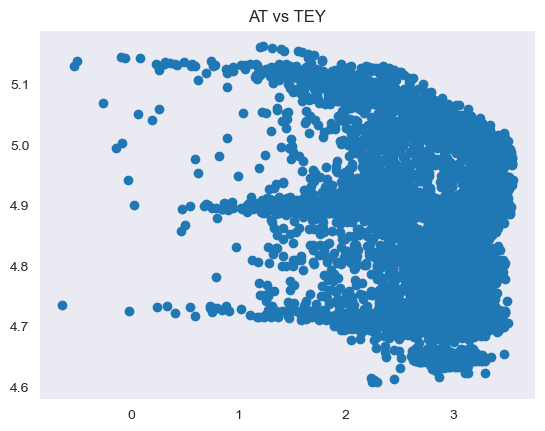

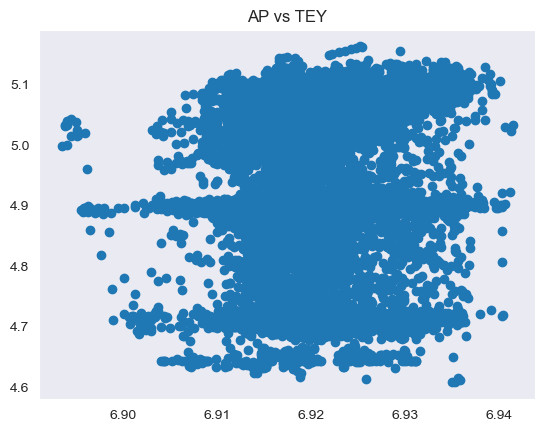

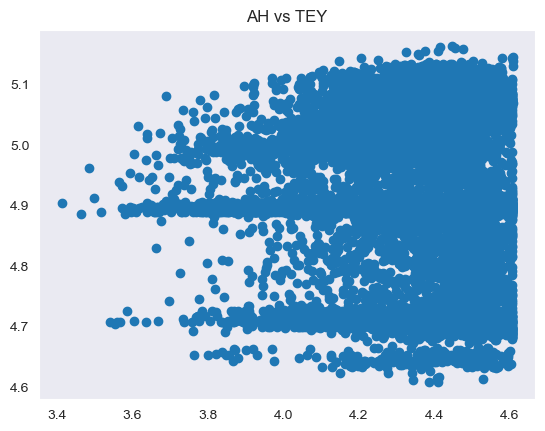

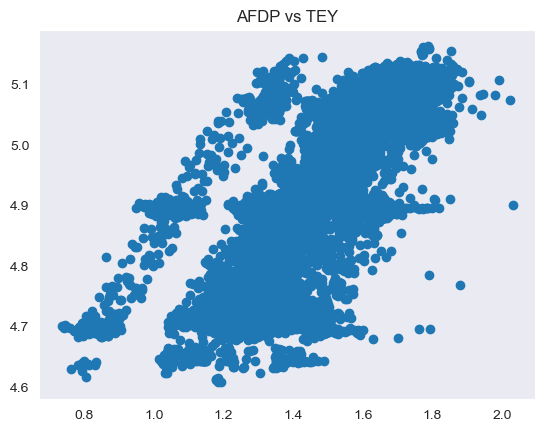

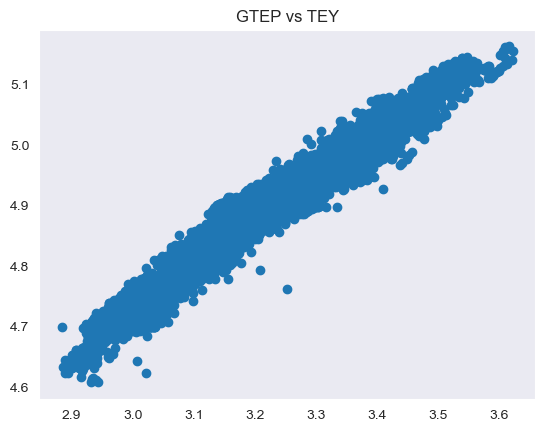

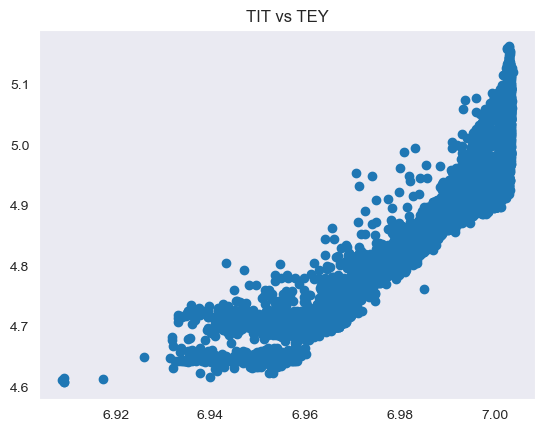

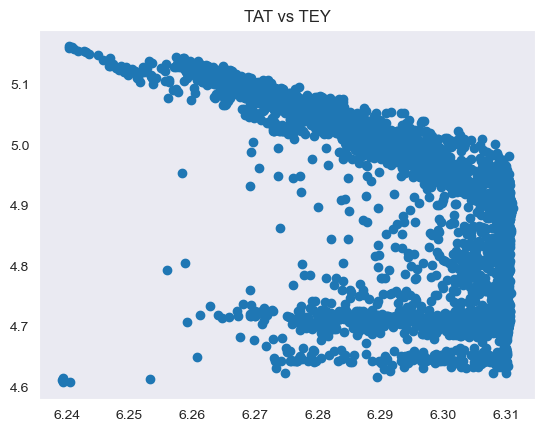

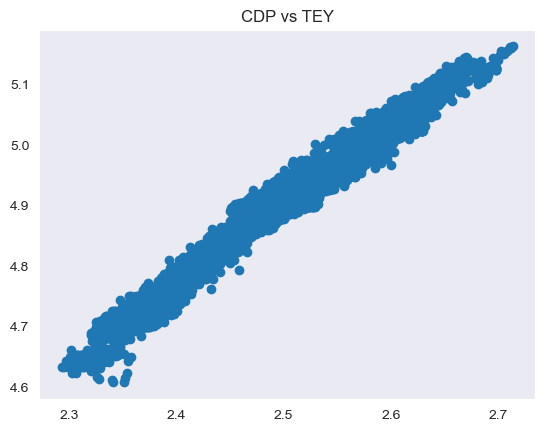

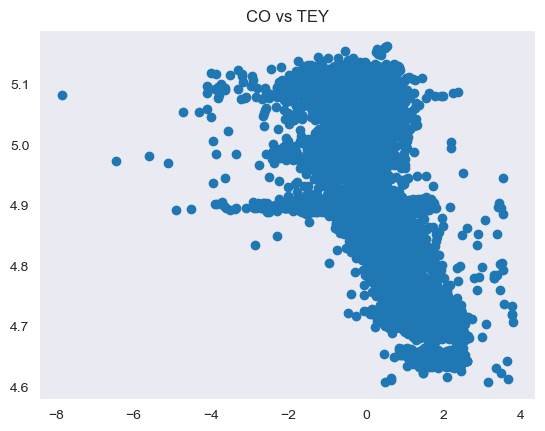

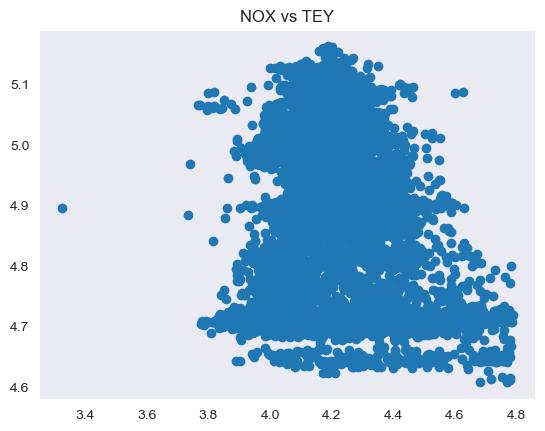

In [178]:
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

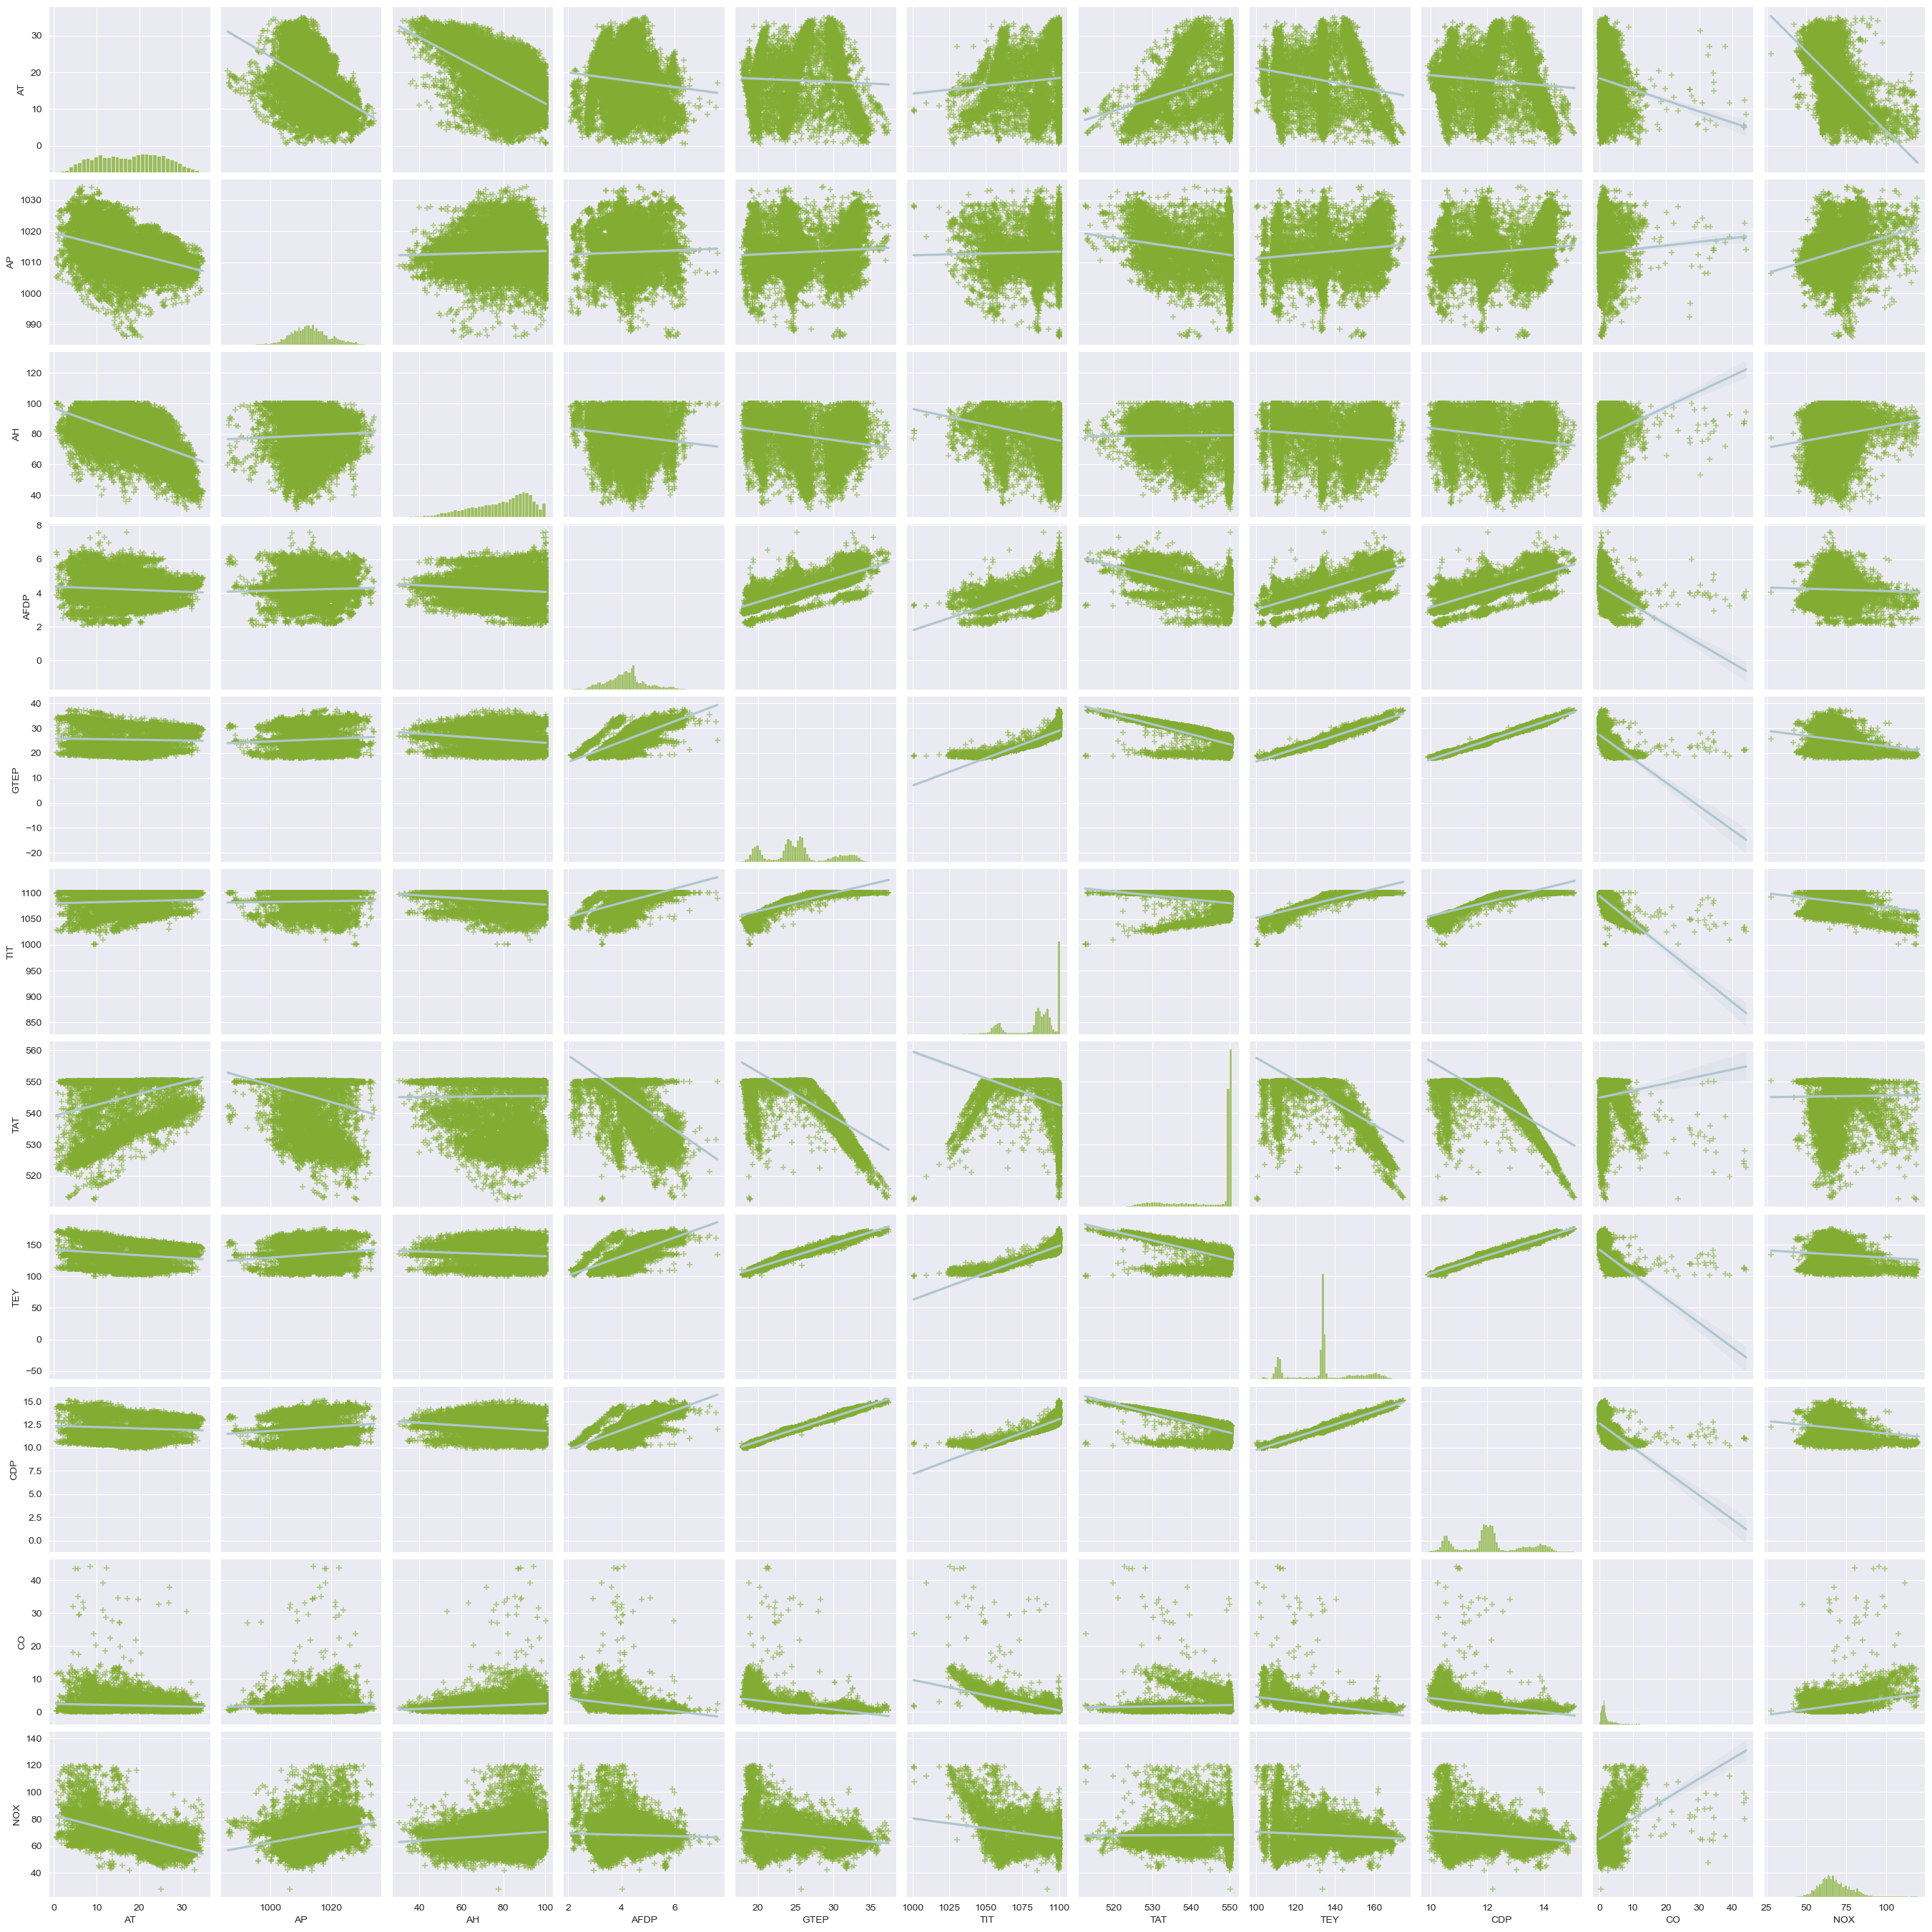

In [179]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

C:\Users\mruna\AppData\Local\Temp\ipykernel_19860\527546533.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

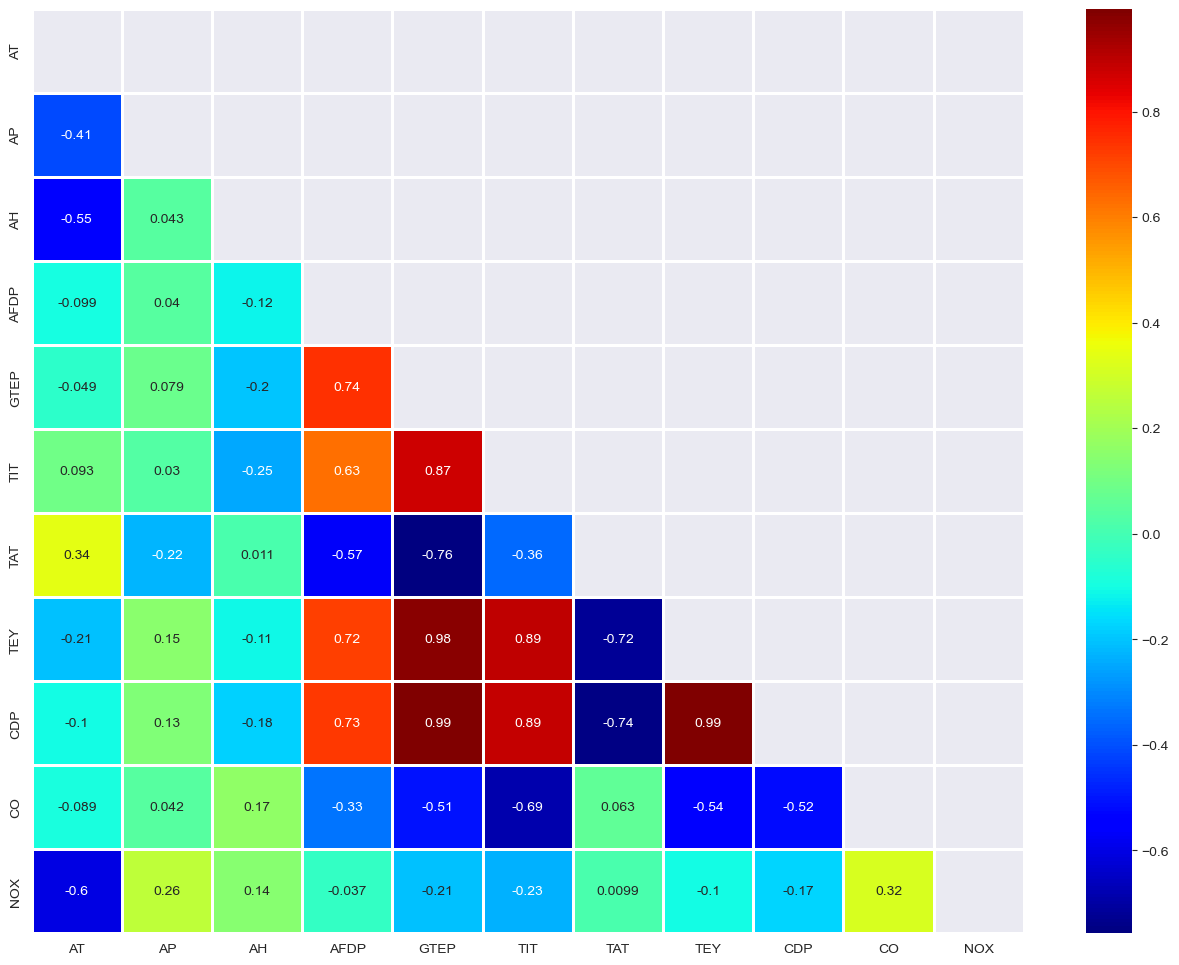

In [180]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [181]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

## Feature Selection Technique<a class="anchor" id="5"></a>

In [184]:
#Feature importance
from numpy import set_printoptions

In [185]:
# feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

C:\Users\mruna\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [187]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.714258,CDP
4,1.599710,GTEP
5,1.325360,TIT
6,0.892695,TAT
3,0.660389,AFDP
8,0.512378,CO
0,0.412855,AT
9,0.300535,NOX
1,0.139497,AP
2,0.097100,AH


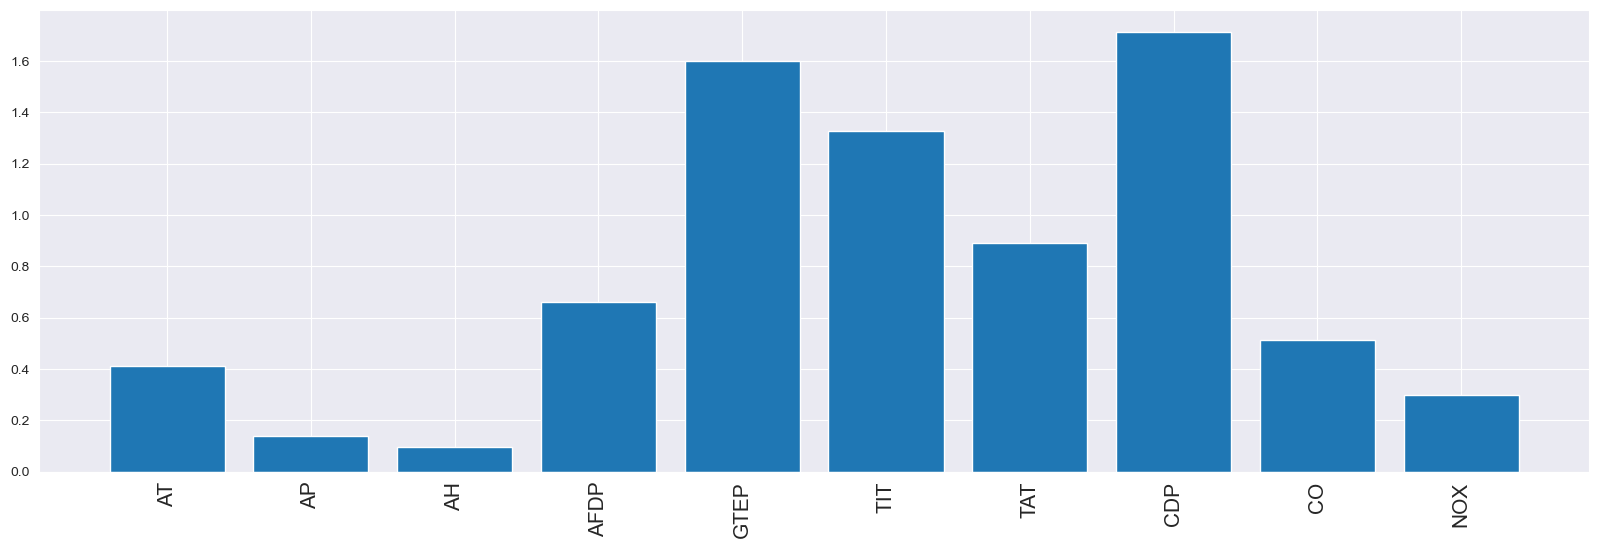

In [188]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

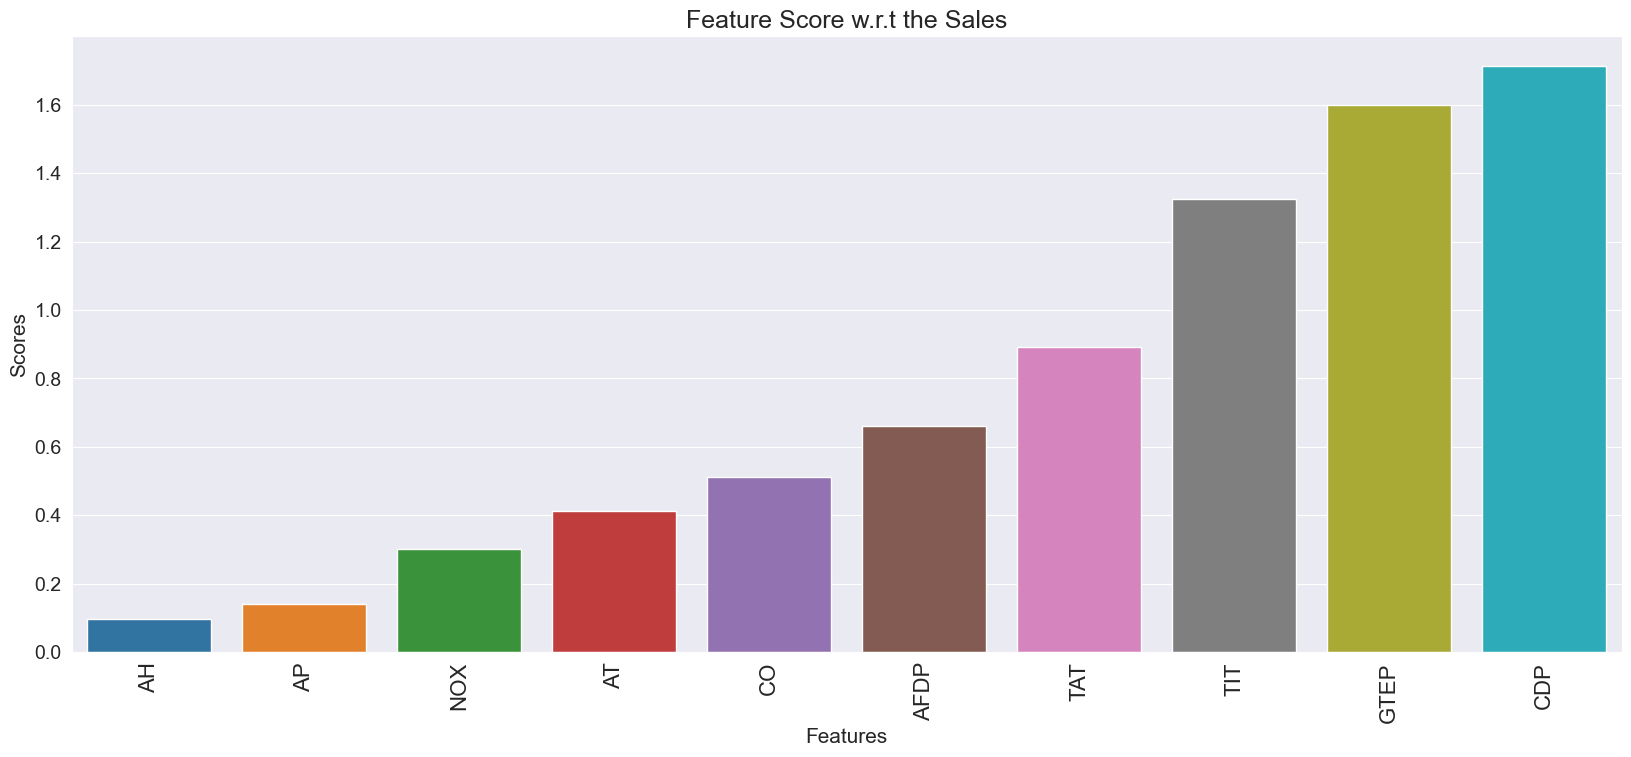

In [189]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [190]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.714258,CDP
4,1.599710,GTEP
5,1.325360,TIT
6,0.892695,TAT
3,0.660389,AFDP
8,0.512378,CO
0,0.412855,AT
9,0.300535,NOX
1,0.139497,AP
2,0.097100,AH


In [191]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [193]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [195]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [196]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [197]:
# Splitting data into test data and train data
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score,train_test_split, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

###  Model Building Neural Networks<a class="anchor" id="7"></a>

In [198]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [199]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [200]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 2s 7ms/step - loss: 17641.5195 - mae: 131.8557 - mse: 17641.5195 - val_loss: 16801.7207 - val_mae: 128.6610 - val_mse: 16801.7207
Epoch 2/100
169/169 [==============================] - 1s 5ms/step - loss: 16305.4121 - mae: 126.6980 - mse: 16305.4102 - val_loss: 15748.6660 - val_mae: 124.5016 - val_mse: 15748.6660
Epoch 3/100
169/169 [==============================] - 1s 5ms/step - loss: 15330.5176 - mae: 122.7912 - mse: 15330.5176 - val_loss: 14830.8574 - val_mae: 120.7595 - val_mse: 14830.8574
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 14445.9541 - mae: 119.1357 - mse: 14445.9541 - val_loss: 13977.9912 - val_mae: 117.1751 - val_mse: 13977.9912
Epoch 5/100
169/169 [==============================] - 1s 5ms/step - loss: 13616.8779 - mae: 115.6033 - mse: 13616.8779 - val_loss: 13173.8496 - val_mae: 113.6920 - val_mse: 13173.8496
Epoch 6/100
169/169 [==============================] - 1s 5ms/step - loss: 

169/169 [==============================] - 1s 5ms/step - loss: 337.0461 - mae: 15.2123 - mse: 337.0461 - val_loss: 318.1664 - val_mae: 14.7754 - val_mse: 318.1664
Epoch 47/100
169/169 [==============================] - 1s 5ms/step - loss: 314.4252 - mae: 14.5268 - mse: 314.4252 - val_loss: 298.6555 - val_mae: 14.1240 - val_mse: 298.6555
Epoch 48/100
169/169 [==============================] - 1s 5ms/step - loss: 296.6869 - mae: 13.9146 - mse: 296.6869 - val_loss: 283.5226 - val_mae: 13.5353 - val_mse: 283.5226
Epoch 49/100
169/169 [==============================] - 1s 5ms/step - loss: 283.1145 - mae: 13.3658 - mse: 283.1145 - val_loss: 272.1620 - val_mae: 13.0126 - val_mse: 272.1620
Epoch 50/100
169/169 [==============================] - 1s 5ms/step - loss: 273.0496 - mae: 12.8768 - mse: 273.0496 - val_loss: 263.8716 - val_mae: 12.5546 - val_mse: 263.8716
Epoch 51/100
169/169 [==============================] - 1s 5ms/step - loss: 265.7733 - mae: 12.4696 - mse: 265.7733 - val_loss: 258.0

169/169 [==============================] - 1s 5ms/step - loss: 0.7955 - mae: 0.5793 - mse: 0.7955 - val_loss: 0.7361 - val_mae: 0.5673 - val_mse: 0.7361
Epoch 95/100
169/169 [==============================] - 1s 5ms/step - loss: 0.7431 - mae: 0.5685 - mse: 0.7431 - val_loss: 0.7622 - val_mae: 0.5769 - val_mse: 0.7622
Epoch 96/100
169/169 [==============================] - 1s 5ms/step - loss: 0.7066 - mae: 0.5578 - mse: 0.7066 - val_loss: 0.7092 - val_mae: 0.5738 - val_mse: 0.7092
Epoch 97/100
169/169 [==============================] - 1s 5ms/step - loss: 0.6871 - mae: 0.5613 - mse: 0.6871 - val_loss: 0.6226 - val_mae: 0.5217 - val_mse: 0.6226
Epoch 98/100
169/169 [==============================] - 1s 5ms/step - loss: 0.6362 - mae: 0.5357 - mse: 0.6362 - val_loss: 0.6314 - val_mae: 0.5379 - val_mse: 0.6314
Epoch 99/100
169/169 [==============================] - 1s 5ms/step - loss: 0.6288 - mae: 0.5376 - mse: 0.6288 - val_loss: 0.5835 - val_mae: 0.5253 - val_mse: 0.5835
Epoch 100/100
169

#### Training Model - using best params

In [201]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

###  Predicting values from Model using same dataset<a class="anchor" id="7.2"></a>

In [202]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.605820
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.383705
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.182297
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.067276
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.118378
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.033974
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.614792
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.253052
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.568008
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.142410


In [203]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

###  Calculating Absolute Percent Error and Error<a class="anchor" id="7.3"></a>

In [204]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.67375018614443


,Actual,Predicted,APE %
13312,134.46,134.605820,0.108448
12627,111.88,112.383705,0.450219
6393,133.72,134.182297,0.345720
4990,133.79,134.067276,0.207247
12462,110.77,111.118378,0.314505


In [205]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.605820,0.108448,-0.001084
1,111.88,112.383705,0.450219,-0.004502
2,133.72,134.182297,0.345720,-0.003457
3,133.79,134.067276,0.207247,-0.002072
4,110.77,111.118378,0.314505,-0.003145
...,...,...,...,...
3003,119.25,119.541153,0.244153,-0.002442
3004,133.74,134.043518,0.226946,-0.002269
3005,146.31,147.235596,0.632626,-0.006326
3006,150.07,150.117401,0.031586,-0.000316


###  Visualizing the Relationship between the Actual and Predicted ValuesModel Validation<a class="anchor" id="7.4"></a>

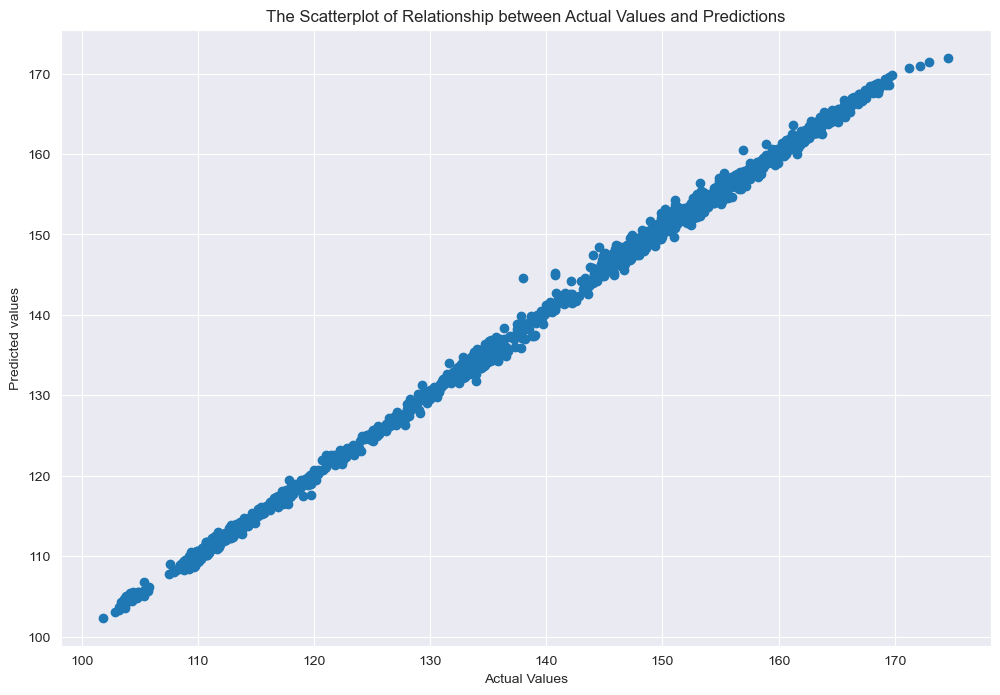

In [206]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [207]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.442390627861023
MSE: 0.39864377026445275
RMSE: 0.6313824279028145


In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9985930443227844
R2_score (test):  0.9984079061508563


In [209]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.86 of the target correctly
